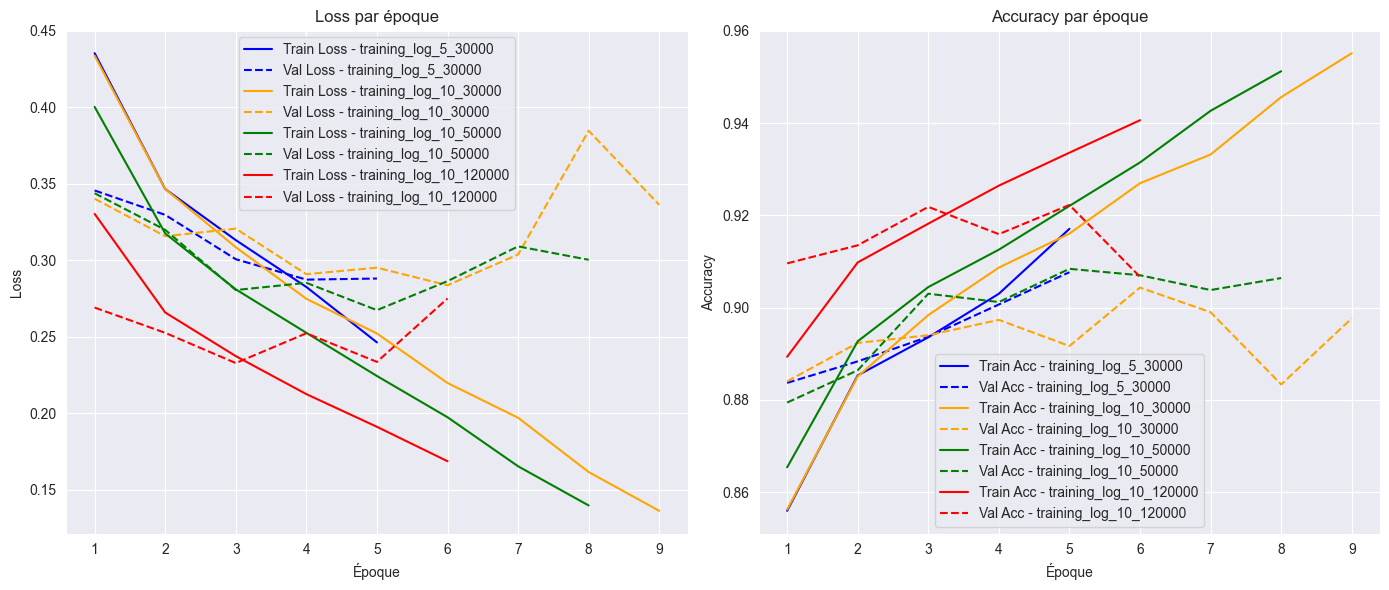


=== Classification Report pour training_log_5_30000 ===
   precision  recall  f1-score  support
0      0.922   0.898     0.910    511.0
1      0.950   0.947     0.949    526.0
2      0.837   0.871     0.854    449.0
3      0.873   0.868     0.870    514.0

=== Classification Report pour training_log_10_30000 ===
   precision  recall  f1-score  support
0      0.868   0.900     0.884   1286.0
1      0.942   0.954     0.948   1270.0
2      0.909   0.784     0.842   1204.0
3      0.837   0.906     0.870   1240.0

=== Classification Report pour training_log_10_50000 ===
   precision  recall  f1-score  support
0      0.939   0.872     0.904   1286.0
1      0.958   0.957     0.957   1270.0
2      0.875   0.835     0.854   1204.0
3      0.826   0.925     0.873   1240.0

=== Classification Report pour training_log_10_120000 ===
   precision  recall  f1-score  support
0      0.936   0.902     0.918   1900.0
1      0.958   0.977     0.968   1900.0
2      0.890   0.867     0.878   1900.0
3      0

In [7]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd

def load_log(filepath):
    with open(filepath, "r") as f:
        return json.load(f)

def plot_metrics(log_files):
    plt.figure(figsize=(14, 6))

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

    for i, filepath in enumerate(log_files):
        log = load_log(filepath)
        label = os.path.basename(filepath).replace(".json", "")

        loss = log["metrics"].get("loss", [])
        val_loss = log["metrics"].get("val_loss", [])
        acc = log["metrics"].get("accuracy", [])
        val_acc = log["metrics"].get("val_accuracy", [])

        epochs = range(1, len(loss) + 1)

        plt.subplot(1, 2, 1)
        plt.plot(epochs, loss, label=f'Train Loss - {label}', color=colors[i % len(colors)], linestyle='-')
        plt.plot(epochs, val_loss, label=f'Val Loss - {label}', color=colors[i % len(colors)], linestyle='--')

        plt.subplot(1, 2, 2)
        plt.plot(epochs, acc, label=f'Train Acc - {label}', color=colors[i % len(colors)], linestyle='-')
        plt.plot(epochs, val_acc, label=f'Val Acc - {label}', color=colors[i % len(colors)], linestyle='--')

    plt.subplot(1, 2, 1)
    plt.title("Loss par époque")
    plt.xlabel("Époque")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.title("Accuracy par époque")
    plt.xlabel("Époque")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def print_classification_reports(log_files):
    for filepath in log_files:
        log = load_log(filepath)
        label = os.path.basename(filepath).replace(".json", "")
        print(f"\n=== Classification Report pour {label} ===")

        report = log.get("classification_report")
        if not report:
            print("Pas de classification_report dans ce log.")
            continue

        # On transforme en DataFrame pour une meilleure lisibilité
        df = pd.DataFrame(report).transpose()

        # Arrondir les chiffres à 3 décimales
        df = df.round(3)

        # Afficher seulement les classes (pas les avg)
        classes = [c for c in df.index if c not in ['accuracy', 'macro avg', 'weighted avg']]
        print(df.loc[classes])

# Exemple d'utilisation
log_files = [
    "training_logs/training_log_5_30000.json",
    "training_logs/training_log_10_30000.json",
    "training_logs/training_log_10_50000.json",
    "training_logs/training_log_10_120000.json",
]

plot_metrics(log_files)
print_classification_reports(log_files)